In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
datafolder='/content/gdrive/My Drive/RockPaperSissors'

In [6]:
rock_images=os.listdir('/content/gdrive/My Drive/RockPaperScissors/rock/')
scissors_images=os.listdir('/content/gdrive/My Drive/RockPaperScissors/scissors/')
paper_images=os.listdir('/content/gdrive/My Drive/RockPaperScissors/paper/')

In [7]:
rock_images[0]

'AzWs0iUTTu8bLtsw.png'

In [8]:
import cv2


In [9]:
import tensorflow as tf
import tensorflow.keras.layers

In [10]:
output_dir='/content/gdrive/My Drive/RockPaperScissors/test'
rockdir=os.path.join(output_dir,'rocks')
scissordir=os.path.join(output_dir,'scissors')
paperdir=os.path.join(output_dir,'paper')
# os.mkdir(rockdir)
# os.mkdir(scissordir)
# os.mkdir(paperdir)

In [11]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img


Using TensorFlow backend.


In [10]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [13]:
rock_images[0]

'AzWs0iUTTu8bLtsw.png'

DATA AUGMENTATION

In [14]:
for image in rock_images:
    img=load_img(os.path.join('/content/gdrive/My Drive/RockPaperScissors/rock/',image))
    img_array=img_to_array(img)
    img_array=img_array.reshape((1,)+img_array.shape)
    i = 0
    for batch in datagen.flow(img_array, batch_size=1,
                              save_to_dir=rockdir, save_prefix='rock', save_format='jpeg'):
        i += 1
        if i > 3:
            break 
for image in scissors_images:
    img=load_img(os.path.join('/content/gdrive/My Drive/RockPaperScissors/scissors/',image))
    img_array=img_to_array(img)
    img_array=img_array.reshape((1,)+img_array.shape)
    i = 0
    for batch in datagen.flow(img_array, batch_size=1,
                              save_to_dir=scissordir, save_prefix='scissor', save_format='jpeg'):
        i += 1
        if i > 3:
            break 
for image in paper_images:
    img=load_img(os.path.join('/content/gdrive/My Drive/RockPaperScissors/paper/',image))
    img_array=img_to_array(img)
    img_array=img_array.reshape((1,)+img_array.shape)
    i = 0
    for batch in datagen.flow(img_array, batch_size=1,
                              save_to_dir=paperdir, save_prefix='paper', save_format='jpeg'):
        i += 1
        if i > 3:
            break 

In [12]:
rock_images=os.listdir(rockdir)
scissors_images=os.listdir(scissordir)
paper_images=os.listdir(paperdir)

In [13]:
print(len(rock_images),len(scissors_images),len(paper_images))

2513 2586 2483


In [14]:
rock_images=rock_images[:2000]
scissors_images=scissors_images[:2000]
paper_images=paper_images[:2000]

In [15]:
X=[]
y=[]
newsize=(128,128)
for i in range(len(rock_images)):
    img=cv2.imread(os.path.join(rockdir,rock_images[i]))
#     plt.imshow(test_img)
    kernel=np.ones((4,4))
    img=cv2.GaussianBlur(img,(3,3),9)
    img=cv2.Canny(img,170,170)
    img=cv2.dilate(img,kernel,iterations=4)
    img=cv2.erode(img,kernel,iterations=1)
    X.append(cv2.resize(img,newsize))
    y.append(0)
for i in range(len(paper_images)):
    img=cv2.imread(os.path.join(paperdir,paper_images[i]))
#     plt.imshow(test_img)
    kernel=np.ones((4,4))
    img=cv2.GaussianBlur(img,(3,3),9)
    img=cv2.Canny(img,170,170)
    img=cv2.dilate(img,kernel,iterations=4)
    img=cv2.erode(img,kernel,iterations=1)
    X.append(cv2.resize(img,newsize))
    y.append(1)
for i in range(len(scissors_images)):
    img=cv2.imread(os.path.join(scissordir,scissors_images[i]))
#     plt.imshow(test_img)
    kernel=np.ones((4,4))
    img=cv2.GaussianBlur(img,(3,3),9)
    img=cv2.Canny(img,170,170)
    img=cv2.dilate(img,kernel,iterations=4)
    img=cv2.erode(img,kernel,iterations=1)
    X.append(cv2.resize(img,newsize))
    y.append(2)


In [16]:
scissors_images[0]

'scissor_0_6152.jpeg'

2

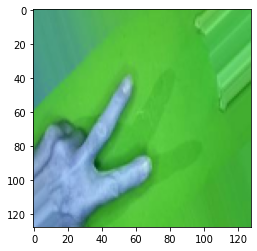

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[10000])
y[10000]

In [17]:
X=np.asarray(X) 
X= np.repeat(X[..., np.newaxis], 3, -1)

In [18]:
X.shape

(6000, 128, 128, 3)

In [19]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=3)

In [20]:
from sklearn.utils import shuffle

In [21]:
X,y=shuffle(X,y,random_state=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.02,random_state=1)

In [20]:
#Now let us create the model


In [23]:
X_train=X_train/255
X_test=X_test/255
# for x in X_train:
#   x=x/255
# for x in X_test:
#   x=x/255

In [22]:
y.shape

(6000, 3)

In [24]:
def make_model(input_size):
  # input_tensor=tf.keras.Input(input_size)
    mobile=tf.keras.applications.MobileNetV2(
    include_top=False, weights='imagenet',input_shape=input_size, 
    pooling='none'
)
#     for layers in mobilev2.layers:
#         print(layers.weights)
    mobile.trainable=False
#     for layer in mobile.layers[10:]:
#         layer.trainable=True
    model=tf.keras.Sequential()
    model.add(mobile)
#     print(model.summary())
#     model.add(tf.keras.layers.Conv2D(
#     30,(5,5), strides=(1, 1), padding='valid',activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros',
# ))
#     model.add(tf.keras.layers.BatchNormalization(axis=-1))
#     model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3)))
# #     model.add(tf.keras.layers.Conv2D(
# #     60,5, strides=(1, 1), padding='valid',activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros',
# # ))
# #     model.add(tf.keras.layers.BatchNormalization(axis=-1))
# #     model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(10,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    # model.add(tf.keras.layers.Dense(5,activation='relu'))
    # model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(3,activation='softmax'))
    model.summary()
    return model
    

In [25]:
!pip install -q pyyaml h5py

In [26]:
import os
checkpoint_path='/content/gdrive/My Drive/RockPaperScissors/test/model1'
checkpoint_dir = os.path.dirname(checkpoint_path)


In [27]:
cp1_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [28]:
optimizer = tf.keras.optimizers.Adam(lr=0.0001)

In [29]:
mod1=make_model((128,128,3))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 20480)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                204810    
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 2,462,827
Trainable params: 204,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
mod1.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
mod1.load_weights(checkpoint_path)

In [30]:
y_train.shape

(5880, 3)

In [32]:
mod1.fit(X_train,y_train,verbose=2,epochs=30,validation_split=0.02,batch_size=100,callbacks=[cp1_callback])

Epoch 1/30


KeyboardInterrupt: ignored

In [33]:
mod1.evaluate(X_test,y_test)

4/4 [==============================] - 0s 94ms/step - loss: 0.0199 - accuracy: 1.0000


[0.019949305802583694, 1.0]

In [ ]:
print(y_test)

In [37]:
mod1.save('/content/gdrive/My Drive/RockPaperScissors/test/testmodel')#Model Used

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/RockPaperScissors/test/testmodel/assets


In [45]:
len(X_test)

120

In [48]:
# from tensorflow.keras.models import load_model
# final_model=load_model('/content/gdrive/My Drive/RockPaperScissors/test/finalmodel')
# import time

In [35]:
import matplotlib.pyplot as plt

In [ ]:
for i in range(len(X_test)):
    plt.imshow(X_test[i])
    print(y_test[i])
    print(mod1.predict_classes(X_test[i:i+1]))
    plt.figure()
    plt.show()

In [33]:
for layers in mod1.layers[11:]:
    layers.trainable=True

In [ ]:
def simple_model(input_size):
#     input_tensor=tf.keras.Input(input_size)
    model=tf.keras.Sequential()
#     print(model.summary())
    model.add(tf.keras.layers.Conv2D(
    15,(10,10), strides=(2, 2), padding='valid',activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros',
input_shape=input_size))
#     print(model.summary())#(60,60)
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(5,5),strides=(1,1))) 
#     print(model.summary())#(56,56)
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(
    30,(7,7), strides=(2, 2), padding='valid',activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros',
))
#     print(model.summary())#(25,25)
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(5,5),strides=(1,1)))
#     print(model.summary())#(21,21)
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(
    50,(5,5), strides=(2, 2), padding='valid',activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros',
)) 
#     print(model.summary())#(9,9)
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(1,1))) ##(6,6)
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(5,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(3,activation='softmax'))
    model.summary()
    return model
    

In [ ]:
optimizer2=tf.keras.optimizers.Adam(lr=0.01)

In [ ]:
checkpoint_path1='/content/gdrive/My Drive/RockPaperScissors/test/model2'
checkpoint_dir1 = os.path.dirname(checkpoint_path1)

In [ ]:
mod2=simple_model((128,128,3))
mod2.compile(optimizer=optimizer2,loss='categorical_crossentropy',metrics=['accuracy'])
checkpoint_path1='/content/gdrive/My Drive/RockPaperScissors/test/model2'
checkpoint_dir1 = os.path.dirname(checkpoint_path1)
cp2_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path1,
                                                 save_weights_only=True,
                                                 verbose=1)
# mod2.fit(X_train,y_train,verbose=2,epochs=30,validation_split=0.02,batch_size=100,callbacks=[cp2_callback])

In [ ]:
mod2.load_weights(checkpoint_path1)

In [ ]:
mod2.fit(X_train,y_train,verbose=2,epochs=20,validation_split=0.02,batch_size=100,callbacks=[cp2_callback])

In [ ]:
mod2.fit(X_train,y_train,verbose=2,epochs=30,validation_split=0.02,batch_size=100,callbacks=[cp2_callback])

ResourceExhaustedError: ignored

In [ ]:
from tensorflow.keras.models import load_model
mod3=load_model('/content/gdrive/My Drive/RockPaperScissors/finalmodel')

In [ ]:
count=0
for i in y_test:
  if i[1]==1:
    count+=1


In [ ]:
print(count)

39


In [ ]:
len(y_test)

120

In [ ]:
mod3.evaluate(X_train,y_train)

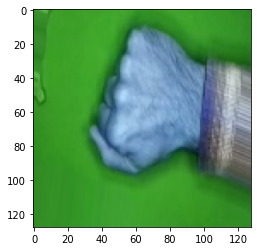

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[70])

[1]
[1]
[2]
[1]
[1]
[1]
[2]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]


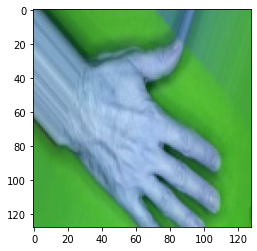

In [ ]:
import time
for i in range(len(y_test)):
  if y_test[i][1]==1:
    prediction=mod3.predict_classes(X_test[i:i+1])
    plt.imshow(X_test[i])
    time.sleep(20)
    print(prediction)